In [1]:
#SCATTER PLOTS
#Question: Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for 
#the years 1980 - 2013.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                      sheet_name='Canada by Citizenship', skiprows=20, skipfooter=2)

In [3]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'],axis=1,inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.set_index('Country', inplace=True)
df_can.columns=list(map(str,df_can.columns))
years=list(map(str, range(1980,2014)))

In [4]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can['Total']=df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [11]:
#total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index) #to int

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


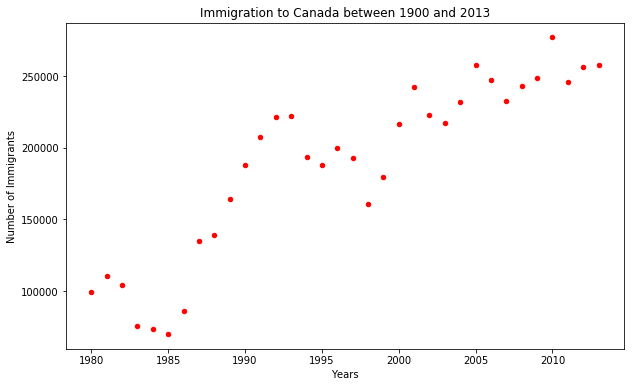

In [17]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='red')

plt.title('Immigration to Canada between 1900 and 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

In [18]:
#plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

x = df_tot['year']      
y = df_tot['total']     
fit = np.polyfit(x, y, deg=1)  #Get the equation of line of best fit

fit

array([ 5.56709228e+03, -1.09261952e+07])

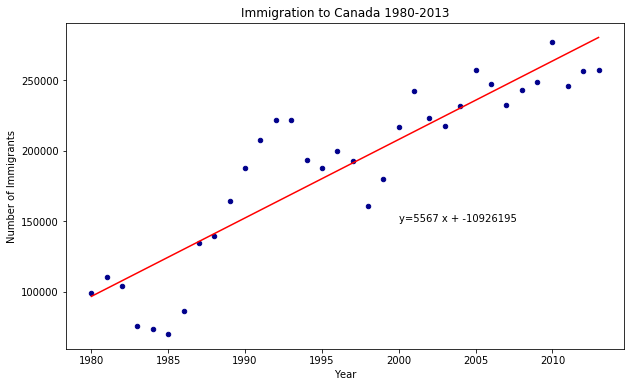

'No. Immigrants = 5567 * Year + -10926195'

In [21]:
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6), color='darkblue')

plt.title('Immigration to Canada 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [22]:
#BUBBLE PLOTS

#Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the 
#government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven 
#out of ten Argentine children were poor at the depth of the crisis in 2002.

#Analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that
#using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble
#as the normalized value of the population for each year.


df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [23]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

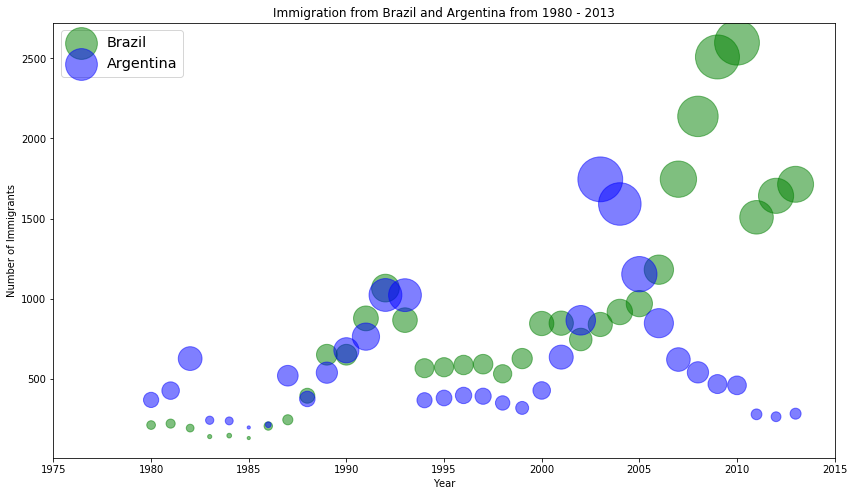

In [24]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')